In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### **Задача: Анализ продаж видеоигр**

**Описание:**
В этой задаче тебе предстоит выполнить анализ данных о видеоиграх, используя открытый датасет `Video Game Sales`. Датасет содержит информацию об игровых платформах, жанрах, издателях, годах выпуска, рейтингах и региональных продажах видеоигр.
Необходимо загрузить данные, выполнить очистку, добавить полезные атрибуты, посчитать ключевые статистики и визуализировать результаты анализа.

#### **Этапы выполнения:**

1. **Загрузка данных:**

   * Импортируй данные из публичного источника.

2. **Предварительная обработка:**

   * Преобразуй данные в `pandas.DataFrame`.
   * Удали строки с пропущенными значениями.
   * Приведи колонку `Year` к целочисленному типу (`int`).
   * Добавь новый столбец `Total_Sales`, содержащий сумму продаж по всем регионам.

3. **Аналитика и статистики:**

   * Найди топ-5 самых продаваемых игр по глобальным продажам.
   * Определи средние глобальные продажи по жанрам.
   * Определи, на каких платформах вышло больше всего игр (топ-10).
   * Вычисли средние продажи по годам выпуска.
   * Найди жанры с наибольшими суммарными продажами.

4. **Визуализация данных:**
   Построй графики на основе полученных данных:

   * Гистограмма топ-5 игр по глобальным продажам.
   * Столбчатая диаграмма средних продаж по жанрам.
   * Гистограмма количества игр на разных платформах.
   * Линейный график средних продаж по годам.
   * Круговая диаграмма долей продаж по жанрам.

#### **Требования:**

* Используй библиотеки `pandas`, `matplotlib`, `seaborn`.
* Все действия выполняются программно.
* Графики должны быть оформлены с подписями и заголовками.


<ipython-input-1-870fcc53140e>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 381k/381k [00:00<00:00, 61.4MB/s]

Extracting zip of vgsales.csv...


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Топ-5 игр по продажам:
                        Name Platform  Global_Sales
0                Wii Sports      Wii         82.74
1         Super Mario Bros.      NES   

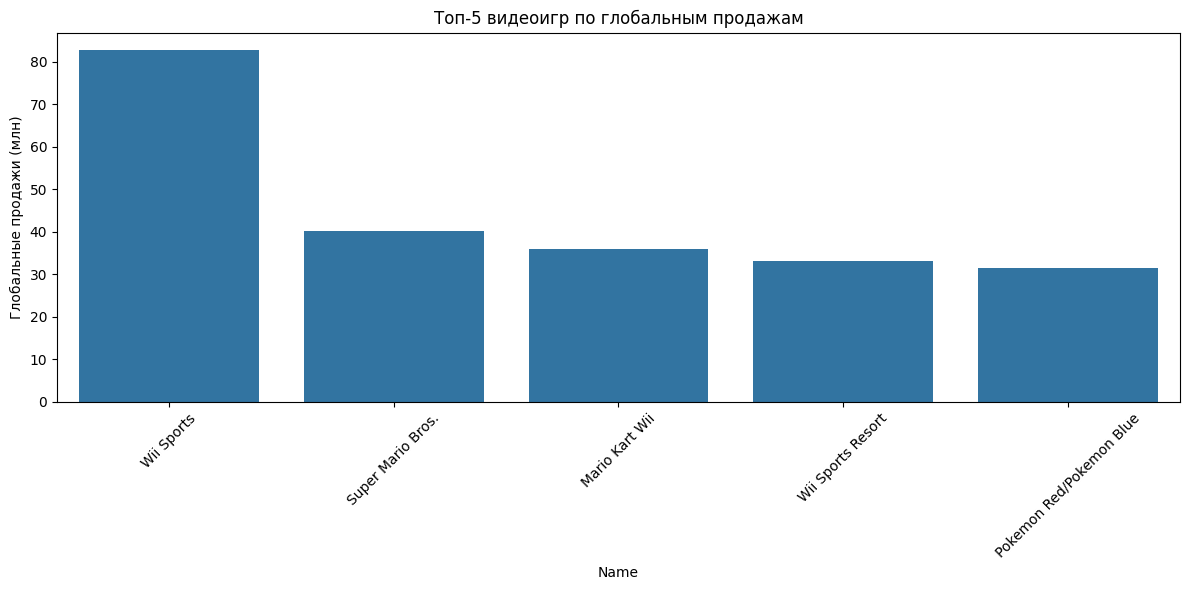

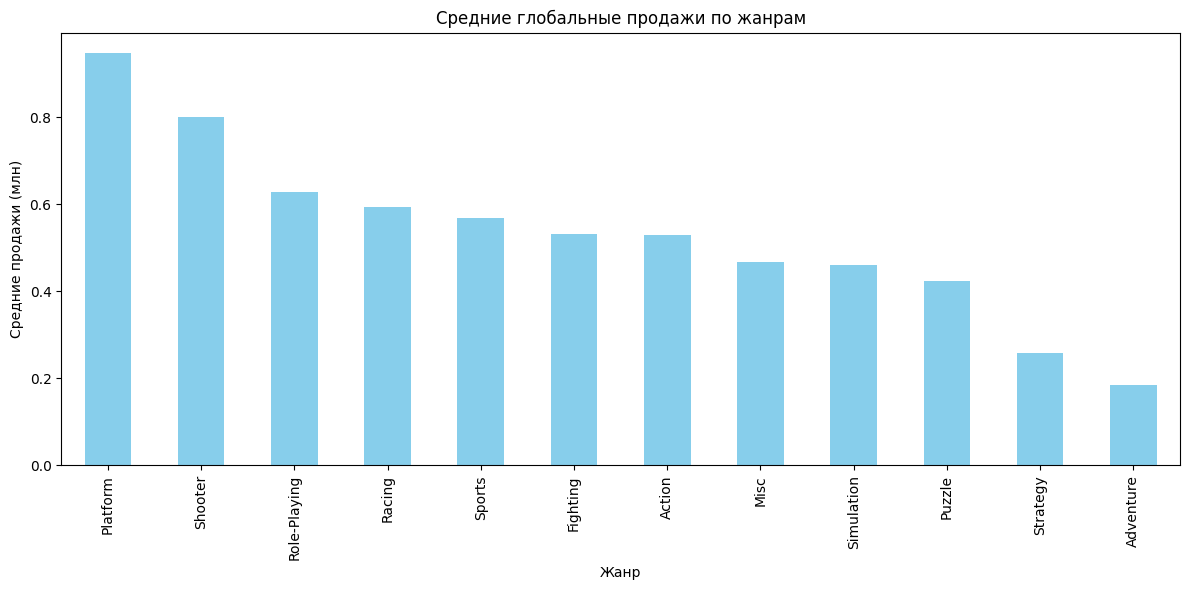

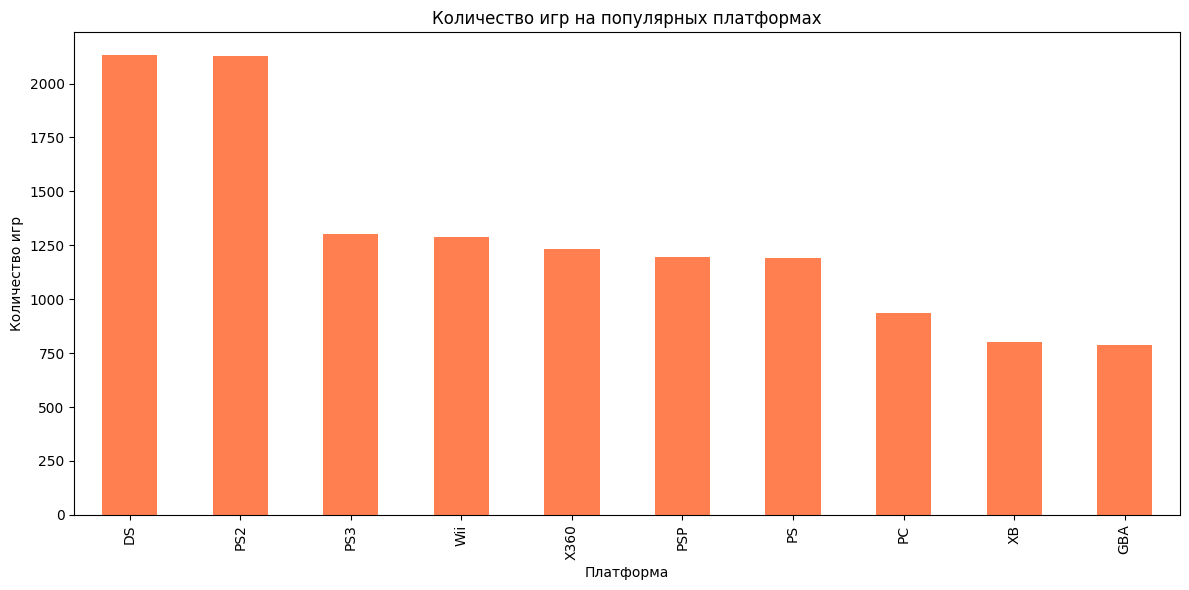

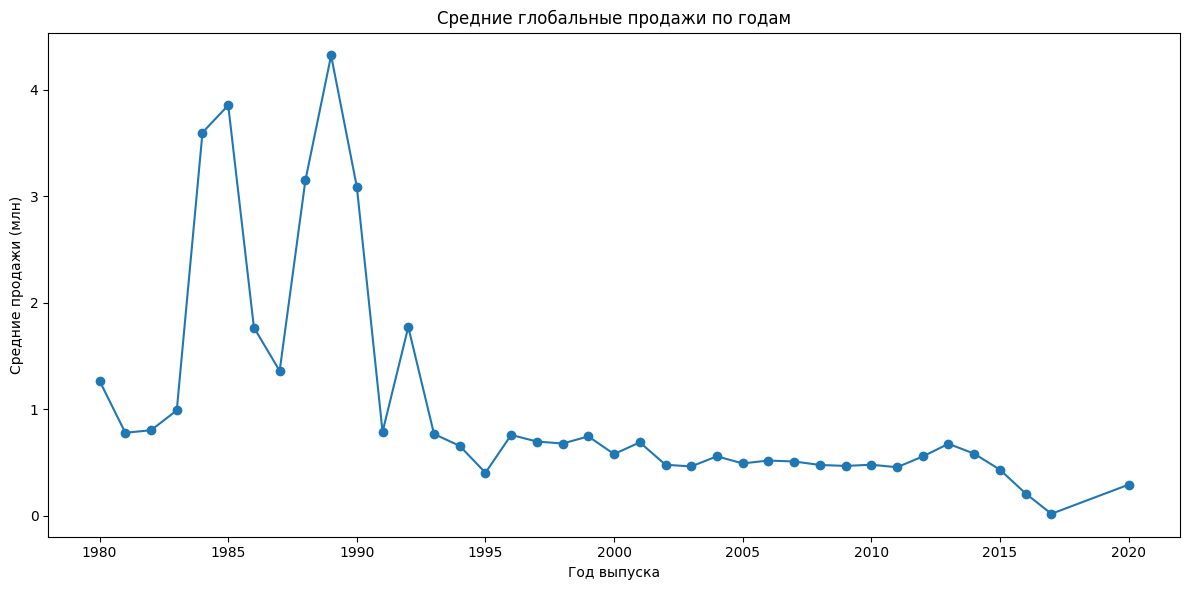

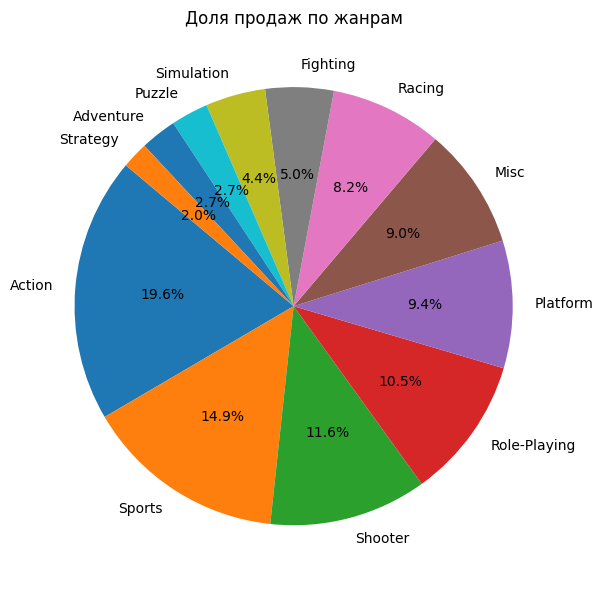

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

# 1. Загрузка данных
file_path = "vgsales.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "joudalnsour/vgsalescsv",
  file_path)

# 2. Предварительная обработка данных

# Посмотрим на первые строки
print(df.head())

# Удалим строки с пропущенными значениями
df.dropna(inplace=True)

# Преобразуем год выпуска к целому типу
df["Year"] = df["Year"].astype(int)

# Добавим новый атрибут: суммарные глобальные продажи в миллионах копий
df["Total_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

# 3. Вычисление статистик и показателей

# 3.1 Топ-5 самых продаваемых игр по миру
top_5_games = df.sort_values(by="Global_Sales", ascending=False).head(5)

# 3.2 Средние продажи по жанрам
avg_sales_by_genre = df.groupby("Genre")["Global_Sales"].mean().sort_values(ascending=False)

# 3.3 Количество игр по платформам
games_per_platform = df["Platform"].value_counts().head(10)

# 3.4 Средняя сумма продаж по годам
avg_sales_by_year = df.groupby("Year")["Global_Sales"].mean()

# 3.5 Самый прибыльный жанр (по суммарным продажам)
total_sales_by_genre = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Печать статистик
print("Топ-5 игр по продажам:\n", top_5_games[["Name", "Platform", "Global_Sales"]])
print("\nСредние продажи по жанрам:\n", avg_sales_by_genre)
print("\nКоличество игр по платформам:\n", games_per_platform)

print(total_sales_by_genre )
# 4. Визуализация данных

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_games["Name"], y=top_5_games["Global_Sales"])
plt.title("Топ-5 видеоигр по глобальным продажам")
plt.ylabel("Глобальные продажи (млн)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
avg_sales_by_genre.plot(kind="bar", color="skyblue")
plt.title("Средние глобальные продажи по жанрам")
plt.ylabel("Средние продажи (млн)")
plt.xlabel("Жанр")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
games_per_platform.plot(kind="bar", color="coral")
plt.title("Количество игр на популярных платформах")
plt.ylabel("Количество игр")
plt.xlabel("Платформа")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
avg_sales_by_year.plot(kind="line", marker='o')
plt.title("Средние глобальные продажи по годам")
plt.ylabel("Средние продажи (млн)")
plt.xlabel("Год выпуска")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
total_sales_by_genre.plot(kind="pie", autopct='%1.1f%%', startangle=140)
plt.title("Доля продаж по жанрам")
plt.ylabel("")
plt.tight_layout()
plt.show()


### **Задача: Анализ сервиса городского проката велосипедов**

**Описание:**
Используя открытый датасет о прокате велосипедов «Bike Sharing Dataset» (Daily), проведите глубокий анализ сезонных, погодных и временных факторов, влияющих на активность пользователей.

#### **Этапы выполнения:**

1. **Загрузка данных:**

   * Загрузите CSV.

2. **Предварительная обработка:**

   * Преобразуйте колонку `dteday` в тип `datetime`.
   * Убедитесь, что нет пропусков; при обнаружении — удалите или заполните их.
   * Приведите все категориальные признаки (`season`, `weathersit`, `mnth`, `weekday`) к понятным меткам или закодируйте в dummy‑переменные.
   * Добавьте новые фичи:

     * `is_weekend` (булево — выходной/будний день),
     * `month_name` (название месяца),
     * скользящее среднее `cnt` за 7 дней (`rolling(7).mean()`).

3. **Расчёт статистик и показателей:**

   1. Найдите среднее количество прокатов (`cnt`) по сезонам.
   2. Определите месяцы с максимальным и минимальным среднесуточным спросом.
   3. Вычислите корреляцию между числом прокатов и погодными параметрами (`temp`, `hum`, `windspeed`).
   4. Посчитайте, насколько (в процентах) увеличивается или уменьшается средний спрос в выходные по сравнению с буднями.
   5. Определите топ‑5 дней с аномально высоким количеством прокатов (более чем на 2σ выше среднего).

4. **Продвинутый анализ:**

   * Проведите сезонную декомпозицию временного ряда `cnt` (Trend/Seasonal/Residual).
   * Кластеризуйте дни по профилю прокатов (например, k‑means на признаках `temp`, `hum`, `cnt`) и охарактеризуйте полученные кластеры.
   * Постройте простую линейную регрессию `cnt ~ temp + hum + windspeed` и оцените качество модели (R², RMSE).

5. **Визуализация:**

   1. **Линейный график** «скользящего» 7‑дневного среднего прокатов.
   2. **Столбчатая диаграмма** средних прокатов по сезонам.
   3. **Boxplot** распределения прокатов по дням недели.
   4. **Точечный график** (scatter) зависимости `cnt` от `temp` с линией линейной регрессии.
   5. **Тепловая карта** среднего количества прокатов по часам и дням недели.
   6. **График сезонной декомпозиции** (Trend/Seasonal/Residual).

### **Требования:**

* Использовать `pandas`, `matplotlib`, `seaborn`, и `sklearn` (для кластеризации и регрессии).
* Графики снабдить заголовками, подписью осей и легендами.
* В конце сформулируйте не менее пяти ключевых инсайтов по результатам исследования.



<ipython-input-2-6917ab6a486a>:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


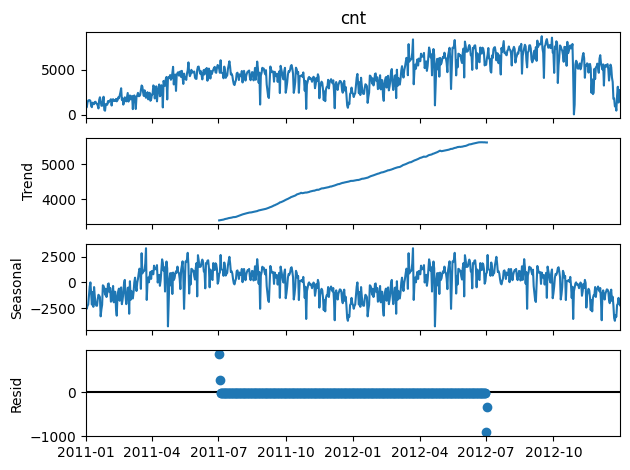

            instant  season  yr  mnth  holiday    weekday  workingday  \
dteday                                                                  
2011-01-01        1  Spring   0     1        0     Sunday           0   
2011-01-02        2  Spring   0     1        0     Monday           0   
2011-01-03        3  Spring   0     1        0    Tuesday           1   
2011-01-04        4  Spring   0     1        0  Wednesday           1   
2011-01-05        5  Spring   0     1        0   Thursday           1   

           weathersit      temp     atemp       hum  windspeed  casual  \
dteday                                                                   
2011-01-01     Cloudy  0.344167  0.363625  0.805833   0.160446     331   
2011-01-02     Cloudy  0.363478  0.353739  0.696087   0.248539     131   
2011-01-03      Clear  0.196364  0.189405  0.437273   0.248309     120   
2011-01-04      Clear  0.200000  0.212122  0.590435   0.160296     108   
2011-01-05      Clear  0.226957  0.229270  0

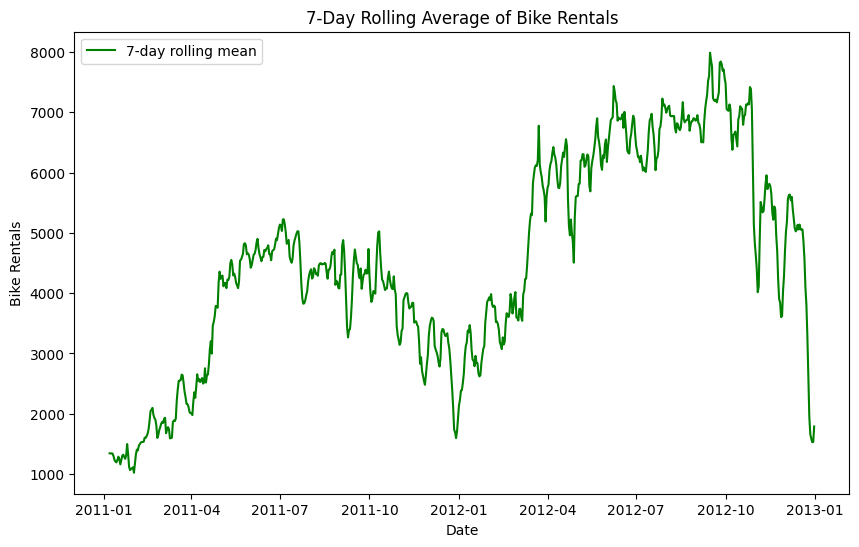

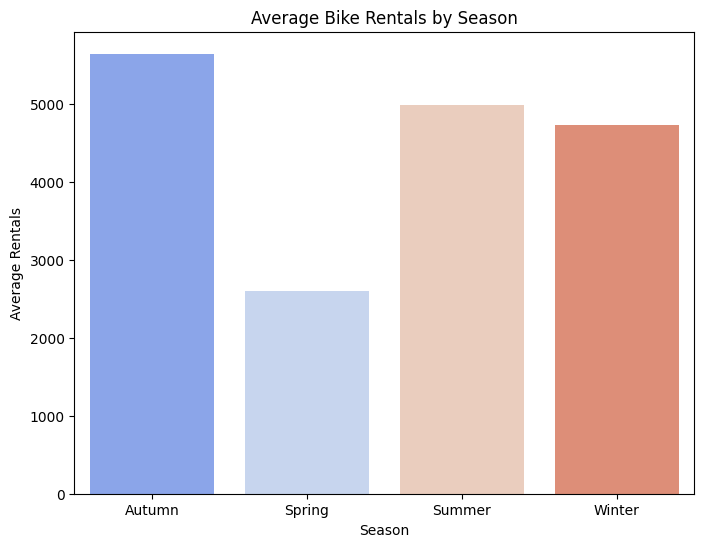

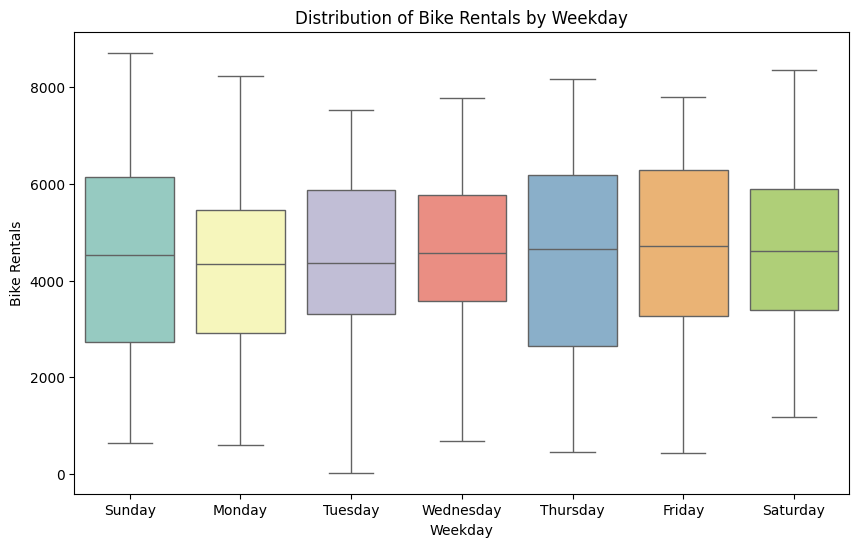

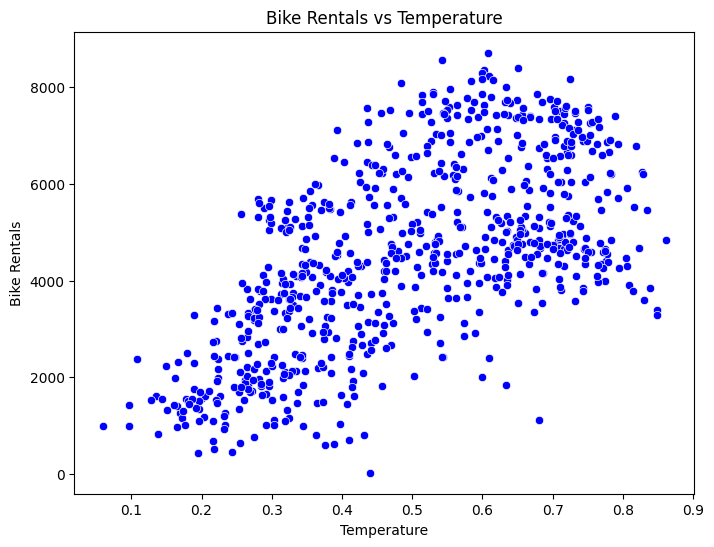

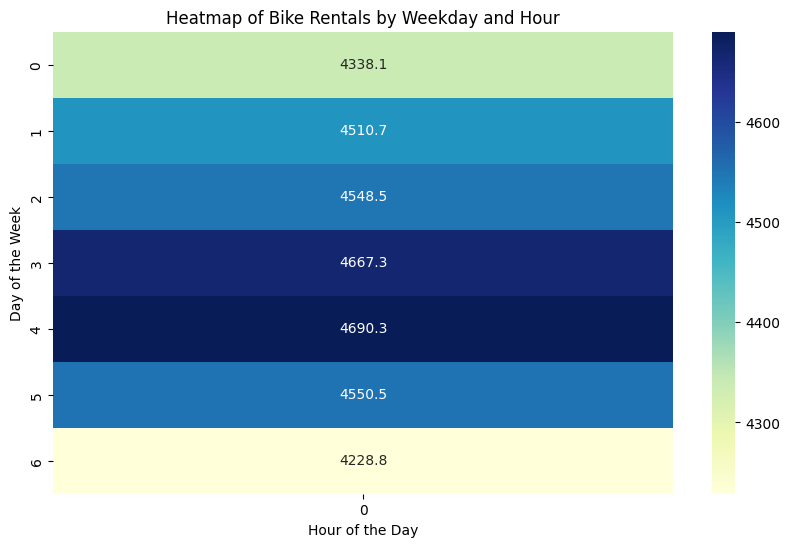

Месяц с максимальным спросом: June
Месяц с минимальным спросом: January
Процентное изменение спроса в выходные: 3.64%
Количество аномальных дней с высокой активностью прокатов: 3
Качество линейной модели (R²): 0.461


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Загрузка данных
file_path = "day.csv"

data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lakshmi25npathi/bike-sharing-dataset",
  file_path)

# Посмотрим на первые строки
print(data.head())

# 2. Предварительная обработка
# Преобразуем колонку dteday в datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Удалим пропуски (если они есть)
data = data.dropna()

# Преобразуем категориальные данные в понятные метки
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})
data['weekday'] = data['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
data['month_name'] = data['mnth'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
    8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Добавим новый столбец, показывающий, выходной день или будний
data['is_weekend'] = data['weekday'].isin(['Saturday', 'Sunday'])

# Добавим скользящее среднее за 7 дней
data['rolling_7'] = data['cnt'].rolling(7).mean()

# 3. Расчёт статистик и показателей
# 3.1 Среднее количество прокатов по сезонам
avg_cnt_season = data.groupby('season')['cnt'].mean()

# 3.2 Месяцы с максимальным и минимальным среднесуточным спросом
avg_cnt_month = data.groupby('month_name')['cnt'].mean()
max_month = avg_cnt_month.idxmax()
min_month = avg_cnt_month.idxmin()

# 3.3 Корреляция между прокатами и погодными параметрами
correlation = data[['cnt', 'temp', 'hum', 'windspeed']].corr()

# 3.4 Процентное изменение прокатов в выходные по сравнению с будними
weekend_cnt = data[data['is_weekend'] == True]['cnt'].mean()
weekday_cnt = data[data['is_weekend'] == False]['cnt'].mean()

# Вычисляем процентное изменение
percentage_change = ((weekend_cnt - weekday_cnt) / weekday_cnt) * 100

# 3.5 Топ-5 дней с аномально высоким количеством прокатов
mean_cnt = data['cnt'].mean()
std_cnt = data['cnt'].std()
outliers = data[data['cnt'] > mean_cnt + 2 * std_cnt]

# 4. Продвинутый анализ
# 4.1 Сезонная декомпозиция временного ряда
data.set_index('dteday', inplace=True)
decomposition = seasonal_decompose(data['cnt'], model='additive', period=365)
decomposition.plot()
plt.show()


# 5. Визуализация данных
# 5.1 Линейный график 7-дневного скользящего среднего прокатов
plt.figure(figsize=(10, 6))
plt.plot(data['rolling_7'], label='7-day rolling mean', color='green')
plt.title('7-Day Rolling Average of Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()

# 5.2 Гистограмма прокатов по сезонам
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_cnt_season.index, y=avg_cnt_season.values, hue=avg_cnt_season.index, palette='coolwarm', legend=False)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.show()

# 5.3 Boxplot распределения прокатов по дням недели
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=data, hue='weekday', palette='Set3', legend=False)
plt.title('Distribution of Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Bike Rentals')
plt.show()

# 5.4 Точечный график зависимости прокатов от температуры
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=data, color='blue')
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Bike Rentals')
plt.show()

# 5.5 Тепловая карта прокатов по дням недели и часам
hourly_data = data.groupby([data.index.dayofweek, data.index.hour])['cnt'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_data, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Heatmap of Bike Rentals by Weekday and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

# Вывод инсайтов:
print(f"Месяц с максимальным спросом: {max_month}")
print(f"Месяц с минимальным спросом: {min_month}")
print(f"Процентное изменение спроса в выходные: {percentage_change:.2f}%")
print(f"Количество аномальных дней с высокой активностью прокатов: {outliers.shape[0]}")
